# Census income classification with scikit-learn

This example uses the standard <a href="https://archive.ics.uci.edu/ml/datasets/Adult">adult census income dataset</a> from the UCI machine learning data repository. We train a k-nearest neighbors classifier using sci-kit learn and then explain the predictions.

In [1]:
import sklearn
import shap

shap.initjs()

## Load the census data

In [2]:
X,y = shap.datasets.adult()
X_display,y_display = shap.datasets.adult(display=True)
X_train, X_valid, y_train, y_valid = sklearn.model_selection.train_test_split(X, y, test_size=0.2, random_state=7)

## Train a k-nearest neighbors classifier

Here we just train directly on the raw data, without any normalizations.

In [3]:
knn = sklearn.neighbors.KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Explain predictions

Normally we would use a logit link function to allow the additive feature inputs to better map to the model's probabilistic output space, but knn's can produce infinite log odds ratios so we don't for this example.

It is important to note that fnlwgt (a statistical reweighting term) is the dominant feature in the 1000 predictions we explain. This is because it has larger variations in value than the other features and so it impacts the k-nearest neighbors calculations more.

In [4]:
f = lambda x: knn.predict_proba(x)[:,1]
med = X_train.median().values.reshape((1,X_train.shape[1]))
explainer = shap.KernelExplainer(f, med)
shap_values_single = explainer.shap_values(X.iloc[0,:], nsamples=1000)
shap.force_plot(shap_values_single, X_display)

In [5]:
shap_values = explainer.shap_values(X_valid.iloc[0:1000,:], nsamples=1000)
shap.force_plot(shap_values, X_valid.iloc[0:1000,:])

100%|██████████| 1000/1000 [00:09<00:00, 101.15it/s]


[<iml.explanations.AdditiveExplanation at 0x1a13c45208>,
 <iml.explanations.AdditiveExplanation at 0x1a13e20f98>,
 <iml.explanations.AdditiveExplanation at 0x1a13c777b8>,
 <iml.explanations.AdditiveExplanation at 0x1a13e36128>,
 <iml.explanations.AdditiveExplanation at 0x1a13e369b0>,
 <iml.explanations.AdditiveExplanation at 0x1a165e1390>,
 <iml.explanations.AdditiveExplanation at 0x1a165e15f8>,
 <iml.explanations.AdditiveExplanation at 0x1a165e1d30>,
 <iml.explanations.AdditiveExplanation at 0x1a165e1978>,
 <iml.explanations.AdditiveExplanation at 0x1a165e1c50>,
 <iml.explanations.AdditiveExplanation at 0x1a165e14e0>,
 <iml.explanations.AdditiveExplanation at 0x1a165e1128>,
 <iml.explanations.AdditiveExplanation at 0x1a165e1940>,
 <iml.explanations.AdditiveExplanation at 0x1a165e1a20>,
 <iml.explanations.AdditiveExplanation at 0x1a165e1da0>,
 <iml.explanations.AdditiveExplanation at 0x1a165e1cf8>,
 <iml.explanations.AdditiveExplanation at 0x1a165e1e80>,
 <iml.explanations.AdditiveExplanation at 0x1a165e1b38>,
 <iml.explanations.AdditiveExplanation at 0x1a165e1c88>,
 <iml.explanations.AdditiveExplanation at 0x1a165e1240>,
 <iml.explanations.AdditiveExplanation at 0x1a165e10b8>,
 <iml.explanations.AdditiveExplanation at 0x1a165e1160>,
 <iml.explanations.AdditiveExplanation at 0x1a165e1860>,
 <iml.explanations.AdditiveExplanation at 0x1a165d9438>,
 <iml.explanations.AdditiveExplanation at 0x1a165d9048>,
 <iml.explanations.AdditiveExplanation at 0x1a165d9b00>,
 <iml.explanations.AdditiveExplanation at 0x1a165d9eb8>,
 <iml.explanations.AdditiveExplanation at 0x1a165d9cf8>,
 <iml.explanations.AdditiveExplanation at 0x1a165d94a8>,
 <iml.explanations.AdditiveExplanation at 0x1a165d9518>,
 <iml.explanations.AdditiveExplanation at 0x1a165d9160>,
 <iml.explanations.AdditiveExplanation at 0x1a165d9630>,
 <iml.explanations.AdditiveExplanation at 0x1a165d9be0>,
 <iml.explanations.AdditiveExplanation at 0x1a165d90f0>,
 <iml.explanations.AdditiveExplanation at 0x1a165d96d8>,
 <iml.explanations.AdditiveExplanation at 0x1a165d9588>,
 <iml.explanations.AdditiveExplanation at 0x1a165d9b70>,
 <iml.explanations.AdditiveExplanation at 0x1a165d9898>,
 <iml.explanations.AdditiveExplanation at 0x1a165d9358>,
 <iml.explanations.AdditiveExplanation at 0x1a165d90b8>,
 <iml.explanations.AdditiveExplanation at 0x1a165d9470>,
 <iml.explanations.AdditiveExplanation at 0x1a13e30588>,
 <iml.explanations.AdditiveExplanation at 0x1a13e30780>,
 <iml.explanations.AdditiveExplanation at 0x1a13e30860>,
 <iml.explanations.AdditiveExplanation at 0x1a13e30128>,
 <iml.explanations.AdditiveExplanation at 0x1a13e300f0>,
 <iml.explanations.AdditiveExplanation at 0x1a13e30ef0>,
 <iml.explanations.AdditiveExplanation at 0x1a13e30908>,
 <iml.explanations.AdditiveExplanation at 0x1a13e30898>,
 <iml.explanations.AdditiveExplanation at 0x1a13e30c50>,
 <iml.explanations.AdditiveExplanation at 0x1a13e307f0>,
 <iml.explanations.AdditiveExplanation at 0x1a13e505f8>,
 <iml.explanations.AdditiveExplanation at 0x1a13e50828>,
 <iml.explanations.AdditiveExplanation at 0x1a13e504a8>,
 <iml.explanations.AdditiveExplanation at 0x1a13e50b38>,
 <iml.explanations.AdditiveExplanation at 0x1a13e50eb8>,
 <iml.explanations.AdditiveExplanation at 0x1a13e50e80>,
 <iml.explanations.AdditiveExplanation at 0x1a13e50978>,
 <iml.explanations.AdditiveExplanation at 0x1a13e50860>,
 <iml.explanations.AdditiveExplanation at 0x1a13e50b00>,
 <iml.explanations.AdditiveExplanation at 0x1a13e50400>,
 <iml.explanations.AdditiveExplanation at 0x1a13e50550>,
 <iml.explanations.AdditiveExplanation at 0x1a13e50198>,
 <iml.explanations.AdditiveExplanation at 0x1a13e50630>,
 <iml.explanations.AdditiveExplanation at 0x1a13e50ef0>,
 <iml.explanations.AdditiveExplanation at 0x1a13e50cc0>,
 <iml.explanations.AdditiveExplanation at 0x1a13e50da0>,
 <iml.explanations.AdditiveExplanation at 0x1a16d5e2b0>,
 <iml.explanations.AdditiveExplanation at 0x1a16d5e160>,
 <iml.explanations.AdditiveExplanation at 0x1a16d5e748>,
 <iml.expl

A summary plot is an even better way to see the relative impact of all features over the entire dataset. Features are sorted by the sum of their SHAP value magnitudes across all samples.

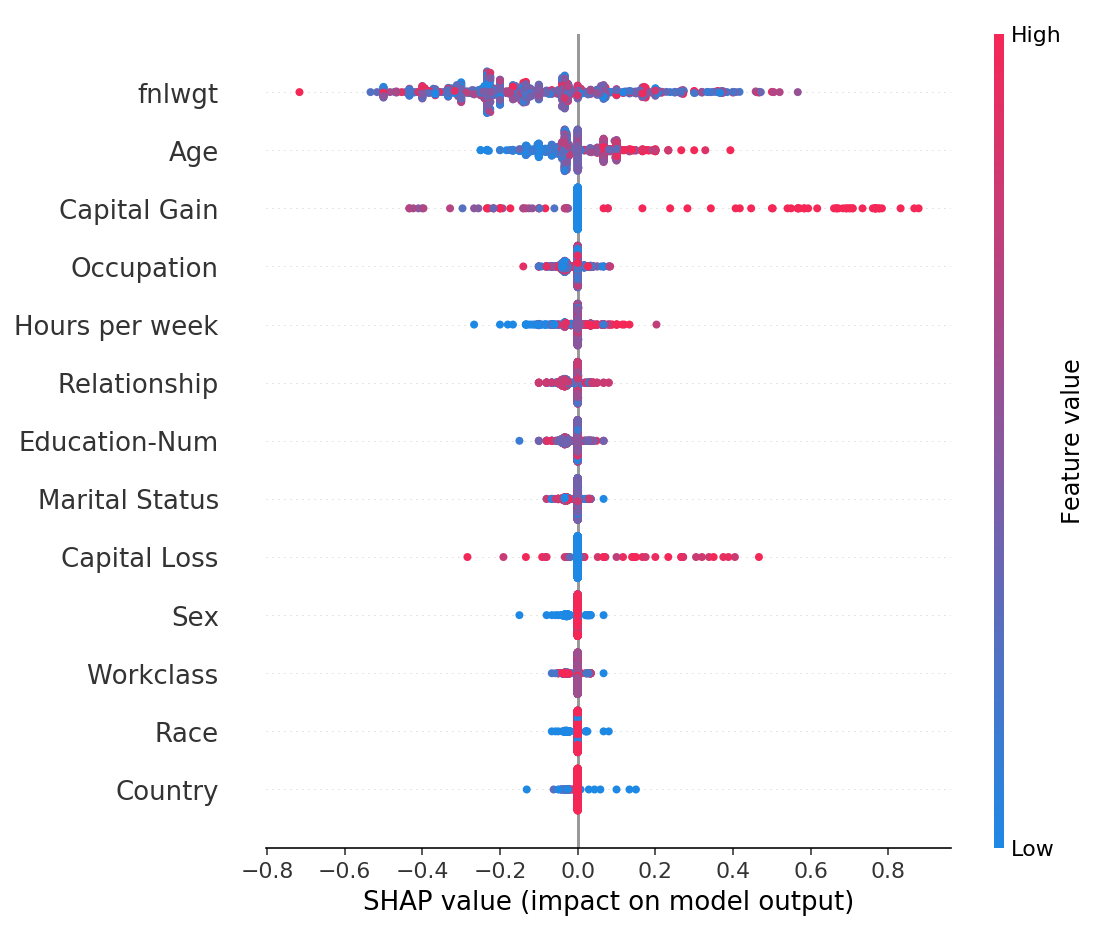

In [6]:
shap.summary_plot(shap_values, X_valid.iloc[0:1000,:])

## Normalize the data before training the model

Here we retrain a KNN model on standardized data.

In [7]:
# normalize data
dtypes = list(zip(X.dtypes.index, map(str, X.dtypes)))
X_train_norm = X_train.copy()
X_valid_norm = X_valid.copy()
for k,dtype in dtypes:
    m = X_train[k].mean()
    s = X_train[k].std()
    X_train_norm[k] -= m
    X_train_norm[k] /= s
    
    X_valid_norm[k] -= m
    X_valid_norm[k] /= s

In [8]:
knn_norm = sklearn.neighbors.KNeighborsClassifier()
knn_norm.fit(X_train_norm, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

### Explain predictions

When we explain predictions from the new KNN model we find that fnlwgt is no longer the dominate feature, but instead more natural features, such as marital status, drive most predictions. This is simple example of hoe explaining why your model is making it's predicitons can uncover problems in the training process.

In [9]:
f = lambda x: knn_norm.predict_proba(x)[:,1]
med = X_train_norm.median().values.reshape((1,X_train_norm.shape[1]))
explainer = shap.KernelExplainer(f, med)
shap_values_norm = explainer.shap_values(X_valid_norm.iloc[0:1000,:], nsamples=1000)
shap.force_plot(shap_values_norm, X_valid.iloc[0:1000,:])

100%|██████████| 1000/1000 [01:44<00:00, 12.67it/s]


[<iml.explanations.AdditiveExplanation at 0x1a13ddce80>,
 <iml.explanations.AdditiveExplanation at 0x1a13ddce48>,
 <iml.explanations.AdditiveExplanation at 0x1508a3b358>,
 <iml.explanations.AdditiveExplanation at 0x1a20d827f0>,
 <iml.explanations.AdditiveExplanation at 0x1a20d82b70>,
 <iml.explanations.AdditiveExplanation at 0x1a20d82ef0>,
 <iml.explanations.AdditiveExplanation at 0x1a20d82f98>,
 <iml.explanations.AdditiveExplanation at 0x1a20d82c50>,
 <iml.explanations.AdditiveExplanation at 0x1a20d825f8>,
 <iml.explanations.AdditiveExplanation at 0x1a20d82fd0>,
 <iml.explanations.AdditiveExplanation at 0x1a20d82c88>,
 <iml.explanations.AdditiveExplanation at 0x1a20d82cf8>,
 <iml.explanations.AdditiveExplanation at 0x1a20d82ba8>,
 <iml.explanations.AdditiveExplanation at 0x1a20d82898>,
 <iml.explanations.AdditiveExplanation at 0x1a20d825c0>,
 <iml.explanations.AdditiveExplanation at 0x1a20d82588>,
 <iml.explanations.AdditiveExplanation at 0x1a20d82320>,
 <iml.explanations.AdditiveExplanation at 0x1a20d82828>,
 <iml.explanations.AdditiveExplanation at 0x1064ba630>,
 <iml.explanations.AdditiveExplanation at 0x1064ba898>,
 <iml.explanations.AdditiveExplanation at 0x1064ba3c8>,
 <iml.explanations.AdditiveExplanation at 0x1064babe0>,
 <iml.explanations.AdditiveExplanation at 0x1064baf60>,
 <iml.explanations.AdditiveExplanation at 0x1064baf98>,
 <iml.explanations.AdditiveExplanation at 0x1064bab70>,
 <iml.explanations.AdditiveExplanation at 0x1064ba588>,
 <iml.explanations.AdditiveExplanation at 0x1064ba0f0>,
 <iml.explanations.AdditiveExplanation at 0x1064bacf8>,
 <iml.explanations.AdditiveExplanation at 0x1064bae48>,
 <iml.explanations.AdditiveExplanation at 0x1064ba080>,
 <iml.explanations.AdditiveExplanation at 0x1064badd8>,
 <iml.explanations.AdditiveExplanation at 0x1064ba5f8>,
 <iml.explanations.AdditiveExplanation at 0x1064ba8d0>,
 <iml.explanations.AdditiveExplanation at 0x1064bad30>,
 <iml.explanations.AdditiveExplanation at 0x1064bae80>,
 <iml.explanations.AdditiveExplanation at 0x106579550>,
 <iml.explanations.AdditiveExplanation at 0x1065798d0>,
 <iml.explanations.AdditiveExplanation at 0x106579160>,
 <iml.explanations.AdditiveExplanation at 0x106579630>,
 <iml.explanations.AdditiveExplanation at 0x1065799e8>,
 <iml.explanations.AdditiveExplanation at 0x106579208>,
 <iml.explanations.AdditiveExplanation at 0x106579dd8>,
 <iml.explanations.AdditiveExplanation at 0x106579940>,
 <iml.explanations.AdditiveExplanation at 0x106579cf8>,
 <iml.explanations.AdditiveExplanation at 0x1065692b0>,
 <iml.explanations.AdditiveExplanation at 0x1065697f0>,
 <iml.explanations.AdditiveExplanation at 0x106569d30>,
 <iml.explanations.AdditiveExplanation at 0x106569668>,
 <iml.explanations.AdditiveExplanation at 0x106569cc0>,
 <iml.explanations.AdditiveExplanation at 0x1065690b8>,
 <iml.explanations.AdditiveExplanation at 0x106569da0>,
 <iml.explanations.AdditiveExplanation at 0x1065692e8>,
 <iml.explanations.AdditiveExplanation at 0x1065695f8>,
 <iml.explanations.AdditiveExplanation at 0x106569198>,
 <iml.explanations.AdditiveExplanation at 0x106569860>,
 <iml.explanations.AdditiveExplanation at 0x106569908>,
 <iml.explanations.AdditiveExplanation at 0x1065699e8>,
 <iml.explanations.AdditiveExplanation at 0x106569518>,
 <iml.explanations.AdditiveExplanation at 0x106556400>,
 <iml.explanations.AdditiveExplanation at 0x106556780>,
 <iml.explanations.AdditiveExplanation at 0x106556b00>,
 <iml.explanations.AdditiveExplanation at 0x106556e80>,
 <iml.explanations.AdditiveExplanation at 0x106556898>,
 <iml.explanations.AdditiveExplanation at 0x1065563c8>,
 <iml.explanations.AdditiveExplanation at 0x106556320>,
 <iml.explanations.AdditiveExplanation at 0x106556f98>,
 <iml.explanations.AdditiveExplanation at 0x106556390>,
 <iml.explanations.AdditiveExplanation at 0x106556ba8>,
 <iml.explanations.AdditiveExplanation at 0x106556d68>,
 <iml.explanations.AdditiveExplanation at 0x106556860>,
 <iml.explanations.AdditiveExplanation at 0x106556c88>,
 <iml.

With a summary plot with see marital status is the most important on average, but other features (such as captial gain) can have more impact on a particular individual.

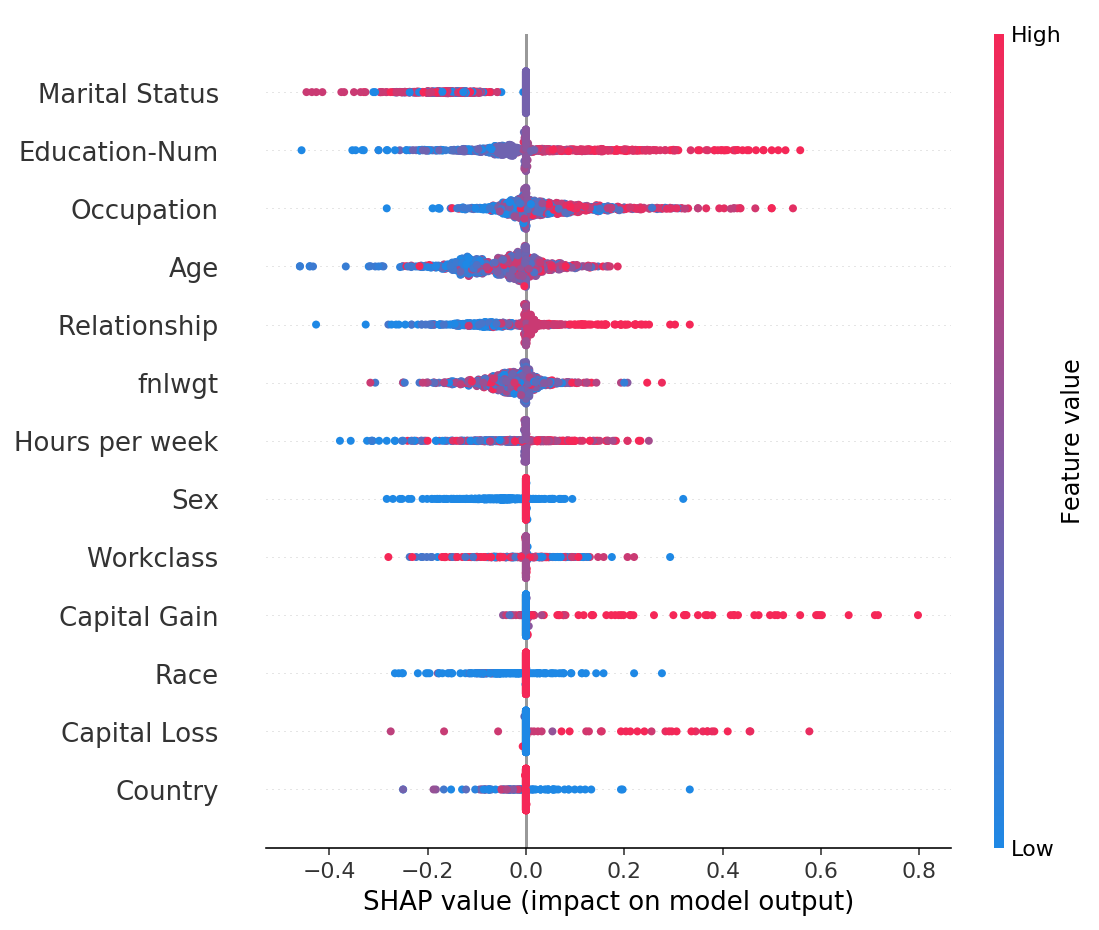

In [10]:
shap.summary_plot(shap_values_norm, X_valid.iloc[0:1000,:])

A dependence plot shows how the number of years of education increases the chance of making over 50K annually.

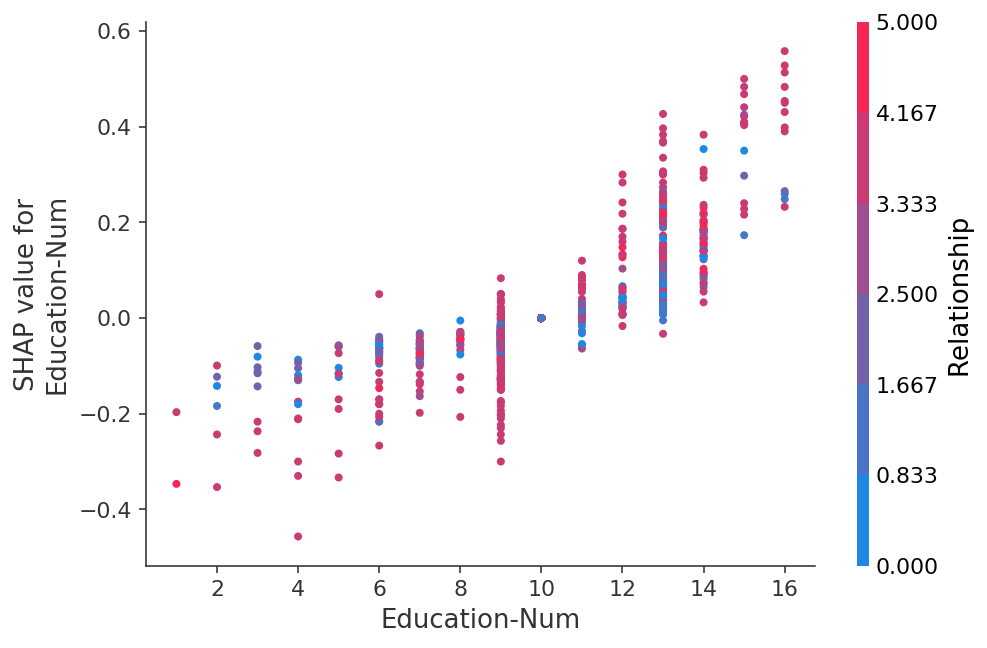

In [12]:
shap.dependence_plot("Education-Num", shap_values_norm, X_valid.iloc[0:1000,:])

Contrast this with how the number of years of education has no trend in the KNN model from unnormalized data:

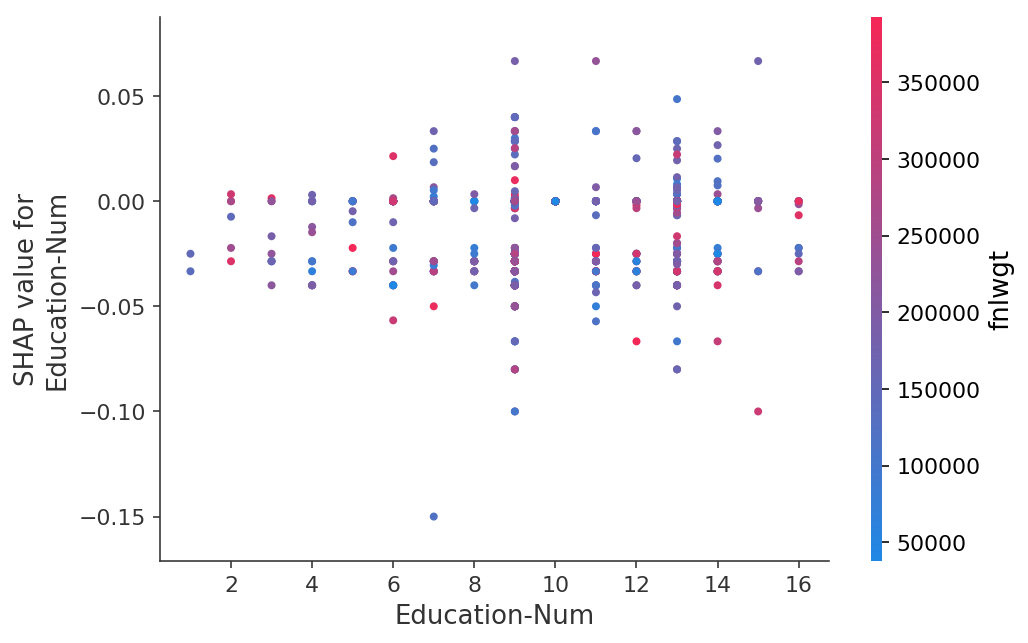

In [13]:
shap.dependence_plot("Education-Num", shap_values, X_valid.iloc[0:1000,:])